Name:  Obembe, Olufemi    
Assignment:  Week4      
Date:  April 08, 2022

## Import the necessary Libararies and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DSC 630/als_data.csv")
data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
# Remove ID column
data = data.drop(['ID','SubjectID'],axis=1)

## Apply StandardScaler to the dataset

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
df = scaler.fit_transform(data)

## Create a plot of the cluster silhouette score versus number of clusters in KMeans

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
silhouette_cofficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df)
  score = silhouette_score(df,kmeans.labels_)
  silhouette_cofficients.append(score)

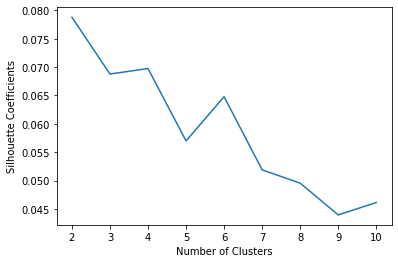

In [8]:
plt.plot(range(2,11),silhouette_cofficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show();

In [9]:
print(silhouette_score(df,kmeans.labels_,metric='euclidean'))

0.046121611845315456


## Use the plot to select optimal number of clusters

In [10]:
#  The plot above seem to suggest 2 as number of clusters because it gives the highest silhouette score

model = KMeans(n_clusters=2,random_state=42)
model.fit_predict(df)

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

Turn the labels to dataframe

In [11]:
kmeans2 = pd.DataFrame(model.labels_,columns=['Cluster'])

In [12]:
kmeans2.head()

,Cluster
0,1
1,1
2,0
3,1
4,0


## Fit a PCA transformation with two features to the scaled data

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2).fit(df)
pca_trans = pca.transform(df)
pca_trans_df = pd.DataFrame(pca_trans, columns =['pca1','pca2'])
km = pd.concat([kmeans2,pca_trans_df],axis=1)

In [15]:
km.head()

,Cluster,pca1,pca2
0,1,-1.426724,-2.320125
1,1,-1.440237,-4.871553
2,0,1.617858,-0.429415
3,1,-1.919995,2.095493
4,0,0.297702,0.167395


## Scatter plot of the PCA

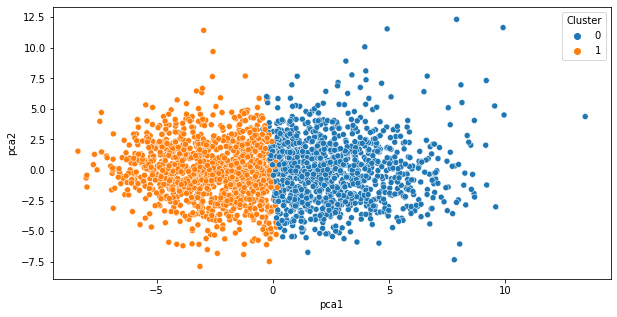

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=km,x='pca1',y='pca2',hue='Cluster');

## Summary and Conclusion

The silouette score was used to obtain the optimal number of k for this exercise.  The method seem to suggest 2 as number of clusters.  The silhoutte score came out to be 5% which is quite low suggesting that the datapoints are not too far away from data points in other clusters.